In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential 
import numpy as np 
from glob import glob 
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf 
print(tf.__version__)

2.9.1


In [3]:
IMAGE_SIZE= [224, 224]

train_path = 'cell_images/Train'
valid_path= 'cell_images/Test'

In [4]:
vgg19= VGG19(input_shape= IMAGE_SIZE + [3], weights= 'imagenet', include_top= False )

In [5]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
for layer in vgg19.layers:
    layer.trainable= False

In [7]:
folders= glob('cell_images/Train/*') #to get the number of classes

In [8]:
x= Flatten()(vgg19.output) #our- layers - you can add more if you want 

In [9]:
prediction= Dense(len(folders), activation= 'softmax')(x)

In [10]:
model_vgg19= Model(inputs= vgg19.input, outputs= prediction)

In [11]:
model_vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### Building Image Classification Model From Scratch

In [12]:
from tensorflow.keras.layers import MaxPooling2D

In [13]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [14]:
model.compile(
loss= 'categorical_crossentropy',
optimizer= 'adam',
metrics= ['accuracy']
)

In [15]:
# to read the files from folder 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale= 1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen= ImageDataGenerator(rescale= 1./255)

In [16]:
training_set= train_datagen.flow_from_directory('cell_images/Train',
                                               target_size= (224, 224),
                                               batch_size=32,
                                               class_mode='categorical'
                                               )

Found 416 images belonging to 2 classes.


In [17]:
test_set= test_datagen.flow_from_directory('cell_images/Test/',
                                              target_size=(224,224),
                                              batch_size= 32,
                                              class_mode= 'categorical')

Found 134 images belonging to 2 classes.


In [18]:
r= model.fit_generator(training_set,
            validation_data= test_set,
            epochs=20,
            steps_per_epoch= len(training_set),
            validation_steps= len(test_set)
            )

C:\Users\user\AppData\Local\Temp\ipykernel_7332\3815356001.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r= model.fit_generator(training_set,


Epoch 1/20
13/13 [==============================] - 24s 2s/step - loss: 2.2879 - accuracy: 0.5216 - val_loss: 0.7409 - val_accuracy: 0.3955
Epoch 2/20
13/13 [==============================] - 23s 2s/step - loss: 0.6575 - accuracy: 0.6298 - val_loss: 0.7775 - val_accuracy: 0.3358
Epoch 3/20
13/13 [==============================] - 22s 2s/step - loss: 0.6502 - accuracy: 0.5986 - val_loss: 0.6759 - val_accuracy: 0.6791
Epoch 4/20
13/13 [==============================] - 22s 2s/step - loss: 0.6649 - accuracy: 0.5673 - val_loss: 0.7668 - val_accuracy: 0.3582
Epoch 5/20
13/13 [==============================] - 23s 2s/step - loss: 0.6178 - accuracy: 0.6490 - val_loss: 0.9304 - val_accuracy: 0.3433
Epoch 6/20
13/13 [==============================] - 22s 2s/step - loss: 0.5897 - accuracy: 0.6803 - val_loss: 0.8597 - val_accuracy: 0.3806
Epoch 7/20
13/13 [==============================] - 23s 2s/step - loss: 0.5038 - accuracy: 0.7524 - val_loss: 1.1250 - val_accuracy: 0.3358
Epoch 8/20
13/13 [==

In [19]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
    
else:
    print('No Gpu')

No Gpu


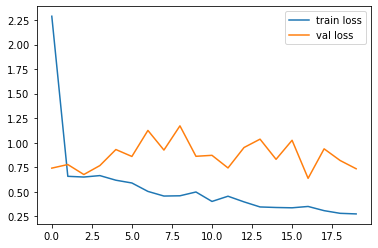

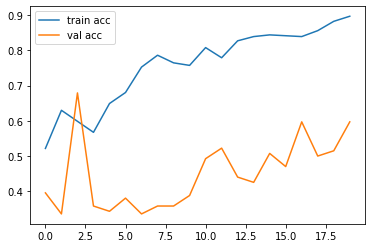

<Figure size 432x288 with 0 Axes>

In [20]:
#plotting the loss

plt.plot(r.history['loss'],label= 'train loss')
plt.plot(r.history['val_loss'], label= 'val loss')
plt.legend()
plt.show()
plt.savefig('Loss chart')

#plot the accuracy

plt.plot(r.history['accuracy'], label= 'train acc')
plt.plot(r.history['val_accuracy'], label= 'val acc')
plt.legend()
plt.show()
plt.savefig('Accuracy Chart')

In [21]:
y_pred=model.predict(test_set)

5/5 [==============================] - 2s 313ms/step


In [22]:
import numpy as np

y_pred= np.argmax(y_pred, axis=1)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 

In [24]:
model= load_model('model_vgg19.h5')

OSError: No file or directory found at model_vgg19.h5

In [25]:
img= image.load_img('cell_images/Test/Uninfected/2.png', target_size= (224,224))

In [26]:
x= image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [27]:
x= x/255

In [28]:
x= np.expand_dims(x,axis=0)
img_data= preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model_vgg19.compile(
loss= 'categorical_crossentropy',
optimizer= 'adam',
metrics= ['accuracy']
)


model_vgg19.fit_generator(training_set,
            validation_data= test_set,
            epochs=20,
            steps_per_epoch= len(training_set),
            validation_steps= len(test_set)
            )

C:\Users\user\AppData\Local\Temp\ipykernel_7332\3420764794.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_vgg19.fit_generator(training_set,


Epoch 1/20
13/13 [==============================] - 289s 22s/step - loss: 1.7183 - accuracy: 0.5240 - val_loss: 0.9603 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 286s 22s/step - loss: 0.8182 - accuracy: 0.6418 - val_loss: 0.7277 - val_accuracy: 0.6045
Epoch 3/20
13/13 [==============================] - 291s 23s/step - loss: 0.4532 - accuracy: 0.7909 - val_loss: 0.7934 - val_accuracy: 0.5821
Epoch 4/20
13/13 [==============================] - 288s 23s/step - loss: 0.3913 - accuracy: 0.8101 - val_loss: 0.4486 - val_accuracy: 0.7761
Epoch 5/20
13/13 [==============================] - 298s 23s/step - loss: 0.3247 - accuracy: 0.8654 - val_loss: 0.4668 - val_accuracy: 0.7537
Epoch 6/20
13/13 [==============================] - 291s 23s/step - loss: 0.3062 - accuracy: 0.8726 - val_loss: 0.3652 - val_accuracy: 0.8358
Epoch 7/20
13/13 [==============================] - 287s 22s/step - loss: 0.2937 - accuracy: 0.8870 - val_loss: 0.4417 - val_accuracy: 0.7761
Epoch 